In [3]:
!pip install fastbook graphviz
#!conda install -c fastai fastbook
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *

In [5]:
!pip install utils

In [6]:
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
#import cv2
import numpy as np


In [7]:
from utils import *

In [8]:
bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = r"/home/glenkings/Downloads/classes1"

In [9]:
#bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
#sz = 224 #image size
#PATH = './classes/'

In [10]:
classes1 = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes1.append(d) 
print ("There are ", len(classes1), "classes:\n", classes1)

There are  2 classes:
 ['cree', 'lilimar']


In [11]:
fns = get_image_files(PATH)
fns

(#310) [Path('/home/glenkings/Downloads/classes1/cree/image30.jpeg'),Path('/home/glenkings/Downloads/classes1/cree/image7.jpeg'),Path('/home/glenkings/Downloads/classes1/cree/images15.jpg'),Path('/home/glenkings/Downloads/classes1/cree/cree-cicchino-4.jpg'),Path('/home/glenkings/Downloads/classes1/cree/images32.jpg'),Path('/home/glenkings/Downloads/classes1/cree/images21.jpg'),Path('/home/glenkings/Downloads/classes1/cree/0OKudRoG.jpg'),Path('/home/glenkings/Downloads/classes1/cree/images49.jpg'),Path('/home/glenkings/Downloads/classes1/cree/Cree-Cicchino-13-251x300.jpg'),Path('/home/glenkings/Downloads/classes1/cree/119459540_155307302888742_5505950083391189743_n.jpg')...]

In [12]:
#failed = verify_images(fns)
#failed

for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [13]:
class DataLoders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train, valid = add_props(lambda i, self: self[i])

In [14]:
classes1 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [15]:
dls = classes1.dataloaders(PATH)

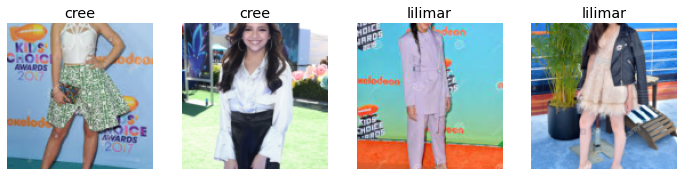

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)

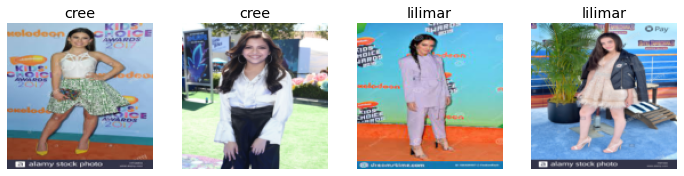

In [17]:
classes1 = classes1.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

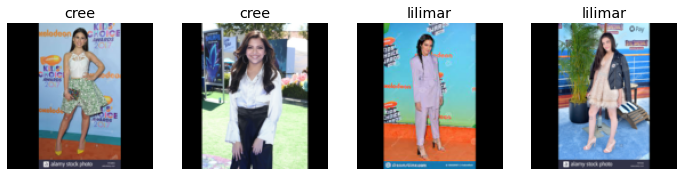

In [18]:
classes1 = classes1.new(item_tfms=Resize(128,ResizeMethod.Pad,
                                        pad_mode='zeros'))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

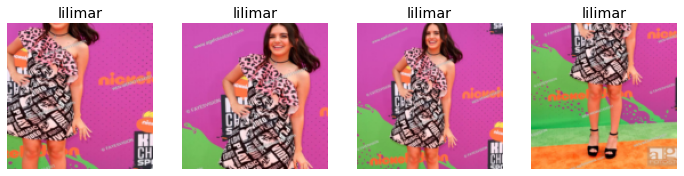

In [19]:
classes1 = classes1.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/home/glenkings/anaconda3/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


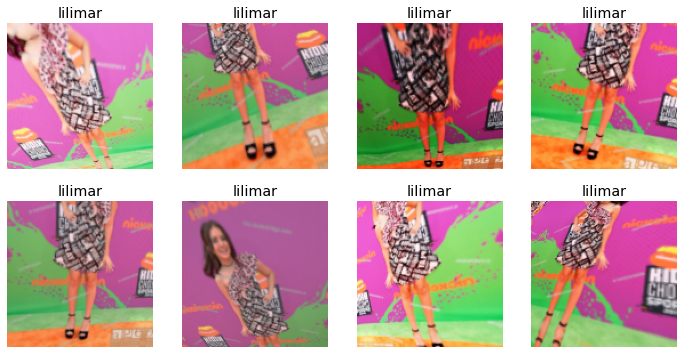

In [20]:
classes1 = classes1.new(item_tfms=Resize(128),
                       batch_tfms=aug_transforms(mult=2))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
classes1 = classes1.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = classes1.dataloaders(PATH)

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/glenkings/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.248020,1.004033,0.548387,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.045487,0.862605,0.467742,02:29
1,0.930635,0.809079,0.370968,02:25
2,0.851308,0.728936,0.370968,02:05
3,0.767755,0.634925,0.322581,01:35


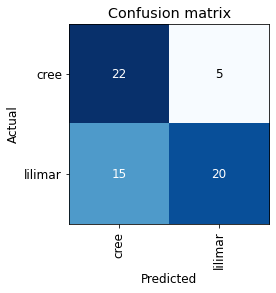

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

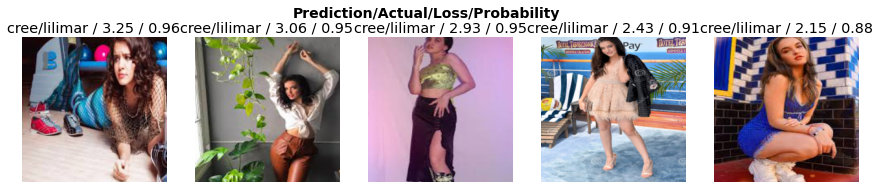

In [26]:
interp.plot_top_losses(5, nrows=1)

In [29]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [49]:
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),
                                             #PATH/cat)
    
#for idx,cat in cleaner.change(): 
    #print(cleaner.fns[idx])
    #shutil.copyfile(cleaner.fns[idx], PATH()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), r"(PATH/cat/)")

#for idx,cat in cleaner.change(): shutil.move(cleaner.fns[idx], f"{PATH}/{cat}")


    

In [50]:
learn.export()

In [52]:
path1=Path()
path1.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]